# Check point 1 for getting the company and the rounds  dataframes and creating a master merge data frame


In [1]:
import numpy as nump
import pandas as pand

# Getting rounds data frame from csv file

In [2]:
rounds_df=pand.read_csv(r'C:\Users\TANVI\OneDrive\Documents\investment_project\rounds2.csv', encoding= 'unicode_escape');
rounds_df.head();

In [3]:
print(rounds_df.head())
print(rounds_df.describe());

                     company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008      

# Getting company data from txt file hosted in server

In [4]:
companies_df=pand.read_csv(r'C:\Users\TANVI\OneDrive\Documents\investment_project\investment_companies.csv', encoding= 'unicode_escape');

In [5]:
print(companies_df.head(2));
print(companies_df.describe());

   Unnamed: 0               permalink      name            homepage_url  \
0           0     /Organization/-Fame     #fame      http://livfame.com   
1           1  /Organization/-Qounter  :Qounter  http://www.qounter.com   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   

  state_code      region           city founded_at  
0         16      Mumbai         Mumbai        NaN  
1         DE  DE - Other  Delaware City   4/9/2014  
        Unnamed: 0
count  66368.00000
mean   33183.50000
std    19158.93567
min        0.00000
25%    16591.75000
50%    33183.50000
75%    49775.25000
max    66367.00000


In [6]:
print(companies_df.iloc[:,0]);

0            0
1            1
2            2
3            3
4            4
         ...  
66363    66363
66364    66364
66365    66365
66366    66366
66367    66367
Name: Unnamed: 0, Length: 66368, dtype: int64


In [7]:
print(rounds_df.count());

company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
dtype: int64


In [8]:
print(companies_df.count());

Unnamed: 0       66368
permalink        66368
name             66367
homepage_url     61310
category_list    63220
status           66368
country_code     59410
state_code       57821
region           58338
city             58340
founded_at       51147
dtype: int64


In [9]:
print(rounds_df.head())

                     company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008      

In [10]:
#As permalink shows unique company name so can be taken as index but some cleaning is required eg lower casing and striping

In [10]:
rounds_df["company_permalink"]=rounds_df["company_permalink"].str.strip();

In [11]:
companies_df["permalink"]=companies_df["permalink"].str.strip()

In [12]:
rounds_df["company_permalink"]=rounds_df["company_permalink"].str.lower();

In [14]:
companies_df["permalink"]=companies_df["permalink"].str.lower();

In [144]:
#Using unique finction to find unique companies in rounds data frame
rounds_unique=len(rounds_df["company_permalink"].unique())
rounds_unique

66370

In [146]:
companies_unique=len(companies_df["permalink"].unique())
companies_unique

66368

In [147]:
#Hence we can infer that 2 companies in rounds df is not in companies df

In [13]:
master_frame=pand.merge(rounds_df,companies_df,how="left",left_on="company_permalink", right_on="permalink");

In [14]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
master_frame.isnull().sum()

company_permalink               0
funding_round_permalink         0
funding_round_type              0
funding_round_code          83809
funded_at                       0
raised_amount_usd           19990
Unnamed: 0                 114949
permalink                  114949
name                       114949
homepage_url               114949
category_list              114949
status                     114949
country_code               114949
state_code                 114949
region                     114949
city                       114949
founded_at                 114949
dtype: int64

In [16]:
master_frame.shape

(114949, 17)

In [17]:
#Checking the percentages of null values rounded up to 2 decimal places
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink            0.00
funding_round_permalink      0.00
funding_round_type           0.00
funding_round_code          72.91
funded_at                    0.00
raised_amount_usd           17.39
Unnamed: 0                 100.00
permalink                  100.00
name                       100.00
homepage_url               100.00
category_list              100.00
status                     100.00
country_code               100.00
state_code                 100.00
region                     100.00
city                       100.00
founded_at                 100.00
dtype: float64

In [155]:
#As we know that raised_amount_usd is the most required field so we need to remove null value rows

In [18]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [19]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [20]:
master_frame.shape

(94959, 17)

In [21]:
print(master_frame.head(10));

                      company_permalink  \
0                   /organization/-fame   
2                /organization/-qounter   
3   /organization/-the-one-of-them-inc-   
4                 /organization/0-6-com   
6      /organization/01games-technology   
7   /organization/0ndine-biomedical-inc   
8   /organization/0ndine-biomedical-inc   
9                  /organization/0xdata   
10                 /organization/0xdata   
11                 /organization/0xdata   

                            funding_round_permalink funding_round_type  \
0   /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
2   /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3   /funding-round/650b8f704416801069bb178a1418776b            venture   
4   /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
6   /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   
7   /funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d               seed   
8   /fun

In [22]:
print(master_frame.permalink.count());

0


In [23]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink            0.00
funding_round_permalink      0.00
funding_round_type           0.00
funding_round_code          70.34
funded_at                    0.00
raised_amount_usd            0.00
Unnamed: 0                 100.00
permalink                  100.00
name                       100.00
homepage_url               100.00
category_list              100.00
status                     100.00
country_code               100.00
state_code                 100.00
region                     100.00
city                       100.00
founded_at                 100.00
dtype: float64

In [162]:
#As funding round code is 70% null values and founded at 16% we dont need them for analysis

In [163]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [164]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

In [165]:
#Data now looks cleaner than before so we can go with this

# Checkpoint 2

In [24]:
#Grouping by funding round type
master_frame_group_by_round_type = master_frame.groupby('funding_round_type')

In [25]:
funding_round_analysis=pand.DataFrame(master_frame_group_by_round_type['raised_amount_usd'].mean());

In [26]:
funding_round_analysis

,raised_amount_usd
funding_round_type,
angel,9.586945e+05
convertible_note,1.453439e+06
debt_financing,1.704353e+07
equity_crowdfunding,5.383682e+05
grant,4.300576e+06
non_equity_assistance,4.112031e+05
post_ipo_debt,1.687046e+08
post_ipo_equity,8.218249e+07
private_equity,7.330859e+07


In [181]:
#Hence venture can be possible investment for sparks for its budget of 10 -15 million USD

In [27]:
master_frame_funding=master_frame.loc[(master_frame.funding_round_type=="venture"),:]

In [28]:
master_frame_funding

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checkpoint 3

In [30]:
type(master_frame.loc[(master_frame.funding_round_type=="venture"),:])

pandas.core.frame.DataFrame

In [31]:
top9=master_frame.loc[(master_frame.funding_round_type=="venture"),:]

In [186]:
#Grouping by country code

In [32]:
top9=top9.groupby("country_code");

In [188]:
#Calculating aggregate for each group

In [33]:
top9=pand.DataFrame(top9["raised_amount_usd"].sum());

In [34]:
top9=top9.sort_values(by="raised_amount_usd",ascending=False).head(9);

In [35]:
top9

,raised_amount_usd
country_code,


In [36]:
top9

,raised_amount_usd
country_code,


In [193]:
#Soring by funding amount and selecting top 9 countries

In [194]:
#Hence USA,GBR,IND would be top 3 english speaking countries

In [37]:
master_frame_funding_top9=master_frame_funding.loc[master_frame_funding["country_code"].isin(top9.index),:];

In [38]:
top9=master_frame_funding_top9

In [39]:
top9

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


# Checkpoint 4

In [40]:
master_frame.category_list

0         NaN
2         NaN
3         NaN
4         NaN
6         NaN
         ... 
114943    NaN
114944    NaN
114945    NaN
114947    NaN
114948    NaN
Name: category_list, Length: 94959, dtype: object

In [42]:
def catfil(x):
    return x.split("|")[0];

In [200]:
#Converting the category list to new_category_list converting to type string and applying a lambda function

In [44]:
print(master_frame);

                                        company_permalink  \
0                                     /organization/-fame   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
6                        /organization/01games-technology   
...                                                   ...   
114943                          /organization/zzzzapp-com   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114947                             /organization/ãasys-2   
114948  /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...   

                                funding_round_permalink funding_round_type  \
0       /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
2       /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3       /funding-round/650b8f7044

In [45]:
category_list=master_frame['new_category_list'];

In [46]:
mapping_df=pand.read_csv(r'C:\Users\TANVI\OneDrive\Documents\investment_project\mapping.csv', encoding= 'unicode_escape');

In [206]:
#mapping the csv category list with master frame category list

In [47]:
mapping_df_primary_category=mapping_df.loc[mapping_df["category_list"].isin(category_list),:];

In [48]:
print(mapping_df_primary_category);

Empty DataFrame
Columns: [category_list, Automotive & Sports, Blanks, Cleantech / Semiconductors, Entertainment, Health, Manufacturing, News, Search and Messaging, Others, Social, Finance, Analytics, Advertising]
Index: []


In [209]:
#Reducing the columns of mapping dataframe,removing columns having 0 and retaining those with ones

In [210]:
#Using melt function unpivot all the columns under "Main sector" and value co`lumn will have 0's and 1's

In [49]:
mapping_df_main_category=pand.melt(mapping_df_primary_category,id_vars=["category_list"],var_name="main_sector");

In [50]:
print(mapping_df_main_category);

Empty DataFrame
Columns: [category_list, main_sector, value]
Index: []


In [213]:
mapping_df_main_category=mapping_df_main_category.loc[mapping_df_main_category["value"]==1];

In [214]:
print(mapping_df_main_category);

          category_list                              main_sector  value
7      Adventure Travel                      Automotive & Sports      1
13            Aerospace                      Automotive & Sports      1
42                 Auto                      Automotive & Sports      1
43      Automated Kiosk                      Automotive & Sports      1
44           Automotive                      Automotive & Sports      1
...                 ...                                      ...    ...
5568        Social News  Social, Finance, Analytics, Advertising      1
5569  Social Television  Social, Finance, Analytics, Advertising      1
5570      Social Travel  Social, Finance, Analytics, Advertising      1
5581    Stock Exchanges  Social, Finance, Analytics, Advertising      1
5612    Venture Capital  Social, Finance, Analytics, Advertising      1

[626 rows x 3 columns]


In [51]:
#Selecting only main sector and category list
mapping_df_main_category=mapping_df_main_category.loc[:,["category_list","main_sector"]];

In [52]:
print(mapping_df_main_category);

Empty DataFrame
Columns: [category_list, main_sector]
Index: []


In [53]:
master_frame_with_main_category=pand.merge(master_frame,mapping_df_main_category,how="left",on="category_list");

In [54]:
master_frame_with_main_category

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,new_category_list,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
4,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94954,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
94955,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
94956,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
94957,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN


# Checkpoint 5

In [55]:
#Merging top9 frame with main category frame
master_frame_with_main_category_top9=pand.merge(master_frame_funding_top9,mapping_df_main_category,how="left",on="category_list");

In [56]:
master_frame_with_main_category_top9

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [57]:
D1_USA=master_frame_with_main_category_top9[(master_frame_with_main_category_top9["country_code"]=="USA")]

In [58]:
D1_USA=D1_USA[(D1_USA['raised_amount_usd'] >= 5000000) & (D1_USA['raised_amount_usd'] <= 15000000)]

In [59]:
D1_USA

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [60]:
D1_USA_group=D1_USA.groupby("country_code");

In [61]:
D1_USA_sum=pand.DataFrame(D1_USA_group["raised_amount_usd"].sum());

In [62]:
D1_USA_sum

,raised_amount_usd
country_code,


In [63]:
D1_USA_count=pand.DataFrame(D1_USA_group["raised_amount_usd"].count());

In [64]:
D1_USA_count

,raised_amount_usd
country_code,


In [65]:
D1_USA_group_main_sector=D1_USA.groupby("main_sector");

In [66]:
D1_USA_main_sector_sum=pand.DataFrame(D1_USA_group_main_sector["raised_amount_usd"].sum());

In [67]:
D1_USA_main_sector_sum

,raised_amount_usd
main_sector,


In [68]:
D1_USA_main_sector_sum=D1_USA_main_sector_sum.sort_values(by="raised_amount_usd",ascending=False);

In [69]:
D1_USA_main_sector_sum

,raised_amount_usd
main_sector,


In [71]:
D1_USA_main_sector_count=pand.DataFrame(D1_USA_group_main_sector["raised_amount_usd"].count()).sort_values(by="raised_amount_usd",ascending=False);

In [72]:
D1_USA_main_sector_count

,raised_amount_usd
main_sector,


In [73]:
D1_USA_Others=D1_USA[D1_USA["main_sector"]=="Others"].sort_values(by="raised_amount_usd",ascending=False);

In [75]:
D1_USA_Others

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [76]:
D1_USA_Semiconductor=D1_USA[D1_USA["main_sector"]=="Cleantech / Semiconductors"].sort_values(by="raised_amount_usd",ascending=False);

In [77]:
D1_USA_Semiconductor

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [240]:
#Doing for United kingdom

In [78]:
D1_GBR=master_frame_with_main_category_top9[(master_frame_with_main_category_top9["country_code"]=="GBR")]

In [79]:
D1_GBR=D1_GBR[(D1_GBR['raised_amount_usd'] >= 5000000) & (D1_GBR['raised_amount_usd'] <= 15000000)]

In [80]:
D1_GBR

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [81]:
D1_GBR_group=D1_GBR.groupby("country_code");

In [82]:
D1_GBR_sum=pand.DataFrame(D1_GBR_group["raised_amount_usd"].sum());

In [83]:
D1_GBR_sum

,raised_amount_usd
country_code,


In [84]:
D1_GBR_count=pand.DataFrame(D1_GBR_group["raised_amount_usd"].count());

In [85]:
D1_GBR_count

,raised_amount_usd
country_code,


In [86]:
D1_GBR_group_main_sector=D1_GBR.groupby("main_sector");

In [87]:
D1_GBR_main_sector_sum=pand.DataFrame(D1_GBR_group_main_sector["raised_amount_usd"].sum());

In [88]:
D1_GBR_main_sector_sum

,raised_amount_usd
main_sector,


In [89]:
D1_GBR_main_sector_sum=D1_GBR_main_sector_sum.sort_values(by="raised_amount_usd",ascending=False);

In [90]:
D1_GBR_main_sector_sum

,raised_amount_usd
main_sector,


In [92]:
D1_GBR_main_sector_count=pand.DataFrame(D1_GBR_group_main_sector["raised_amount_usd"].count()).sort_values(by="raised_amount_usd",ascending=False);

In [93]:
D1_GBR_main_sector_count

,raised_amount_usd
main_sector,


In [94]:
D1_GBR_Others=D1_GBR[D1_GBR["main_sector"]=="Others"].sort_values(by="raised_amount_usd",ascending=False);

In [95]:
D1_GBR_Others

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [96]:
D1_GBR_Semiconductor=D1_GBR[D1_GBR["main_sector"]=="Cleantech / Semiconductors"].sort_values(by="raised_amount_usd",ascending=False);

In [97]:
D1_GBR_Semiconductor

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [114]:
# Doing same for India

In [98]:
D1_IND=master_frame_with_main_category_top9[(master_frame_with_main_category_top9["country_code"]=="IND")]

In [99]:
D1_IND=D1_IND[(D1_IND['raised_amount_usd'] >= 5000000) & (D1_IND['raised_amount_usd'] <= 15000000)]

In [100]:
D1_IND

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [101]:
D1_IND_group=D1_IND.groupby("country_code");

In [102]:
D1_IND_sum=pand.DataFrame(D1_IND_group["raised_amount_usd"].sum());

In [103]:
D1_IND_sum

,raised_amount_usd
country_code,


In [104]:
D1_IND_count=pand.DataFrame(D1_IND_group["raised_amount_usd"].count());

In [105]:
D1_IND_count

,raised_amount_usd
country_code,


In [106]:
D1_IND_group_main_sector=D1_IND.groupby("main_sector");

In [107]:
D1_IND_main_sector_sum=pand.DataFrame(D1_IND_group_main_sector["raised_amount_usd"].sum());

In [108]:
D1_IND_main_sector_sum

,raised_amount_usd
main_sector,


In [109]:
D1_IND_main_sector_sum=D1_IND_main_sector_sum.sort_values(by="raised_amount_usd",ascending=False);

In [110]:
D1_IND_main_sector_sum

,raised_amount_usd
main_sector,


In [111]:
D1_IND_main_sector_count=pand.DataFrame(D1_IND_group_main_sector["raised_amount_usd"].count()).sort_values(by="raised_amount_usd",ascending=False);

In [112]:
D1_IND_main_sector_count

,raised_amount_usd
main_sector,


In [113]:
D1_IND_Others=D1_IND[D1_IND["main_sector"]=="Others"].sort_values(by="raised_amount_usd",ascending=False);

In [114]:
D1_IND_Others

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


In [115]:
D1_IND_News=D1_IND[D1_IND["main_sector"]=="News, Search and Messaging"].sort_values(by="raised_amount_usd",ascending=False);

In [116]:
D1_IND_News

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Unnamed: 0,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,category_list,main_sector


# Checkpoint 6 Plotting graphs

In [126]:
#Plotting graph 1

In [127]:
import matplotlib.pyplot as plt

In [128]:
import seaborn as sns

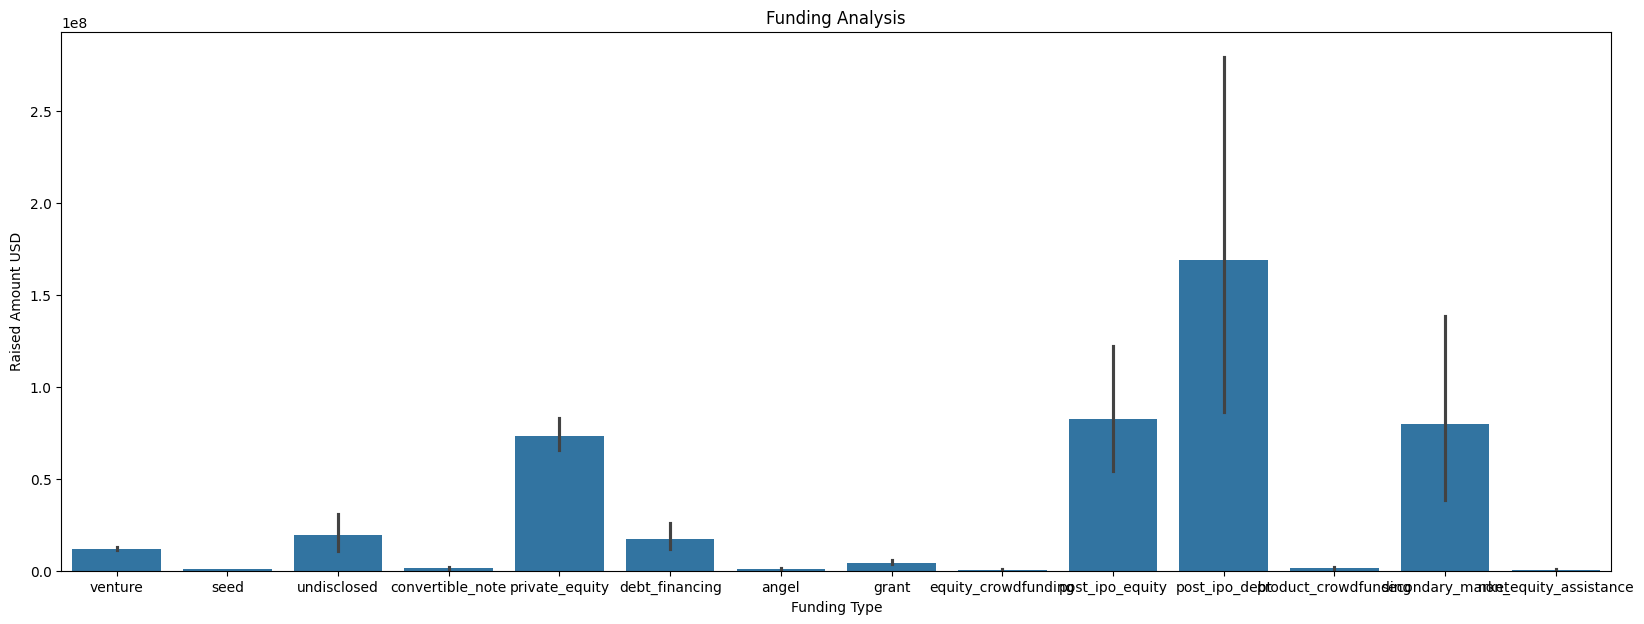

In [136]:
# As funding type is categorical data and we need aggregation
#on that we would go with barplot with default aggregation as mean
plt.figure(figsize=(20,7))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
g.set(xlabel='Funding Type', ylabel='Raised Amount USD')
g.set_title('Funding Analysis')
plt.show()